### Домашнее задание к уроку №2

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})
from sklearn import datasets

In [2]:
X, y, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=3, 
                                      n_informative=3, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)
coef

array([98.35672065, 81.87402295, 25.9670839 ])

Определим функции для подсчета MSE и весов по методам классического градиентного спуска, стохастического градиентного спуска и mini-batch градиентного спуска:

In [6]:
#Расчет MSE
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, eta=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
    return w

# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, eta=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
    return w

# mini-batch градиентный спуск
def eval_mbGD(X, y, iterations, batch=10, eta=1e-3):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch # число батчей
    if n % batch != 0:
        n_batch += 1
    print('Количество батчей - ', n_batch)
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_batch = X[start_ : end_, :]
            y_batch = y[start_ : end_]
            y_pred = np.dot(X_batch, w)
            w -= eta * (2/len(y_batch) * np.dot(X_batch.T, (y_pred - y_batch)))
    return w

Визуализируем изменение весов для каждого метода при изменении количества итераций:

In [4]:
iter_list = np.array([10, 100, 500, 1000, 2000, 5000, 10000])
mse_list_1 = []

for i in iter_list:
    w = eval_GD(X, y, i)
    mse_list_1.append(calc_mse(y, X @ w))
errors_1 = np.array(mse_list_1)

errors_1

array([15539.38653562, 11044.83354245,  2444.96689069,   391.77338402,
          33.11459948,    24.44722022,    24.44709351])

In [5]:
mse_list_2 = []

for i in iter_list:
    w_new = eval_SGD(X, y, i)
    mse_list_2.append(calc_mse(y, X @ w_new))
errors_2 = np.array(mse_list_2)

errors_2

array([15461.13629953, 11591.56879014,  2365.91026623,   366.67284983,
          31.45381876,    24.46640331,    24.46174289])

In [7]:
mse_list_3 = []

for i in iter_list:
    w_new = eval_mbGD(X, y, i)
    mse_list_3.append(calc_mse(y, X @ w_new))
errors_3 = np.array(mse_list_3)

errors_3

Количество батчей -  100
Количество батчей -  100
Количество батчей -  100
Количество батчей -  100
Количество батчей -  100
Количество батчей -  100
Количество батчей -  100


array([391.41755071,  24.44724345,  24.44724345,  24.44724345,
        24.44724345,  24.44724345,  24.44724345])

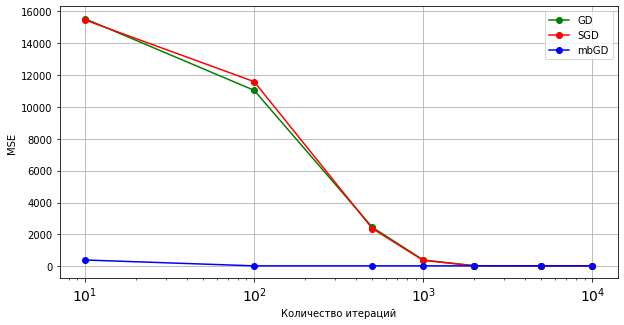

In [10]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(iter_list, errors_1, 'go-', label=r'GD')
plt.plot(iter_list, errors_2, 'ro-', label=r'SGD')
plt.plot(iter_list, errors_3, 'bo-', label=r'mbGD')
plt.xlabel('Количество итераций')
plt.ylabel('MSE')
plt.grid()
plt.legend();

Выводы:

Расчет весов по методам классического и стохастического градиентного спусков сходятся практически с одной скоростью (при одинаковой скорости обучения eta). Расчет по методу mini-batch сошелся уже при 100 итерациях, то есть в 50 раз быстрее чем первые два метода. Но при этом веса за одну итерацию корректировались по 100 раз, что занимает больше времени.

2.[*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов L1 и L2 на величину весов для примера из урока (лучше графически).

Возьмем данные из урока:

In [11]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

Определим функции для градиентного спуска с учетом L1 И L2 регуляризации. Производная от $|w_{j}|$ равна 1 при положительных $|w_{j}|$, равна -1 при отрицательных $|w_{j}|$ и равна 0, когда $|w_{j}|$ = 0.

In [15]:
def eval_model_reg1(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
          if w[j] > 0:
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)) + lambda_)
          elif w[j] < 0:
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)) - lambda_)
          else:
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [30]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

Стандартизируем признаки X:

In [32]:
X_st = X.copy().astype(np.float64)

X_st[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_st[:, 1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [33]:
w = eval_model_reg1(X_st, y, iterations=100, eta=1e-4, lambda_=0.001, verbose=True)

10: weights=[2.65693473e+20 1.19221388e+20 3.23124095e+23 5.43649721e+20], MSE=2220015003616234519835471995056824763168650690560.000
20: weights=[1.43309926e+44 6.43057136e+43 1.74286895e+47 2.93234157e+44], MSE=645872337691608730420304848601965071226045868790961114415272644731806492445167327465182473486336.000
30: weights=[7.72986057e+67 3.46852596e+67 9.40069840e+70 1.58164839e+68], MSE=187904620426310645744791534307805983417172452719091579546776820903903657502325303492840820180430610722938851921163881890577999643904684421283840.000
40: weights=[4.16933746e+91 1.87085589e+91 5.07055511e+94 8.53110587e+91], MSE=54667376688943788571374009295210561014428547534720630927265249589226812252610818992668536140409684957912099491794189835895543397046698141861707871600230438871370791409769997473330022420840448.000
50: weights=[2.24886008e+115 1.00910353e+115 2.73495947e+118 4.60151370e+115], MSE=15904462951845649975435256164724982457026077379567971907482305624878246877114275631258111697384473257

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
w = eval_model_reg2(X_st, y, iterations=100, eta=1e-4, lambda_=0.001, verbose=True)

10: weights=[2.65693475e+20 1.19221389e+20 3.23124098e+23 5.43649725e+20], MSE=2220015034622883177556904647863767979788219711488.000
20: weights=[1.43309929e+44 6.43057146e+43 1.74286898e+47 2.93234162e+44], MSE=645872357652415516933378999762788815619515364948820113929458859591291702442271261067888274964480.000
30: weights=[7.72986076e+67 3.46852604e+67 9.40069863e+70 1.58164843e+68], MSE=187904629416328324341590286134824760921256649464869929572542246836527539797137842764577250681774525873810504025281870265834575260377862876692480.000
40: weights=[4.16933760e+91 1.87085596e+91 5.07055527e+94 8.53110616e+91], MSE=54667380230397177616669960991963569910834123039002466318417450455995133288003848818319120059926138839833003643971657557186858020340034177489961536795995821554958925379486758307843991089971200.000
50: weights=[2.24886017e+115 1.00910357e+115 2.73495958e+118 4.60151389e+115], MSE=15904464251561034613441495476199382667760212637424801852019690890349757267075054175114501227979827955

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


Расчеты не сходятся...